# Question 6 of HW2
### Amirhosein Pourdavoud (810101120)

In [206]:
import matplotlib.pyplot as plt
import numpy as np
import math
from collections import Counter

## KNN algorithm

In [256]:
def knn(X_train, y_train, query, k, distance_fn, choice_fn):
    result = []
    for q in query:
        neighbor_distances_and_indices = []
        for ind, x in enumerate(X_train):
            distance = distance_fn(x, q)
            neighbor_distances_and_indices.append((distance, ind))
    
        sorted_neighbor_distances_and_indices = sorted(neighbor_distances_and_indices)
        k_nearest_distances_and_indices = sorted_neighbor_distances_and_indices[:k]
        k_nearest_labels = [y_train[i] for distance, i in k_nearest_distances_and_indices]
        # result.append([k_nearest_labels, choice_fn(k_nearest_labels)])
        result.append(choice_fn(k_nearest_labels))
    return(np.array(result))

def mean(labels):
    return sum(labels) / len(labels)

def classification(lst):
    counts = Counter(lst)
    most_common = max(counts, key=counts.get)
    return most_common

def euclidean_distance(point1, point2):
    sum_squared_distance = 0
    for i in range(len(point1)):
        sum_squared_distance += math.pow(point1[i] - point2[i], 2)
    return math.sqrt(sum_squared_distance)

## load dataset

In [208]:
from sklearn import datasets
data_frame = datasets.load_iris(return_X_y=False, as_frame=False)

In [209]:
data_frame.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [210]:
list(data_frame.target_names)

['setosa', 'versicolor', 'virginica']

In [211]:
data = data_frame.data
target = data_frame.target

## Scatter plot

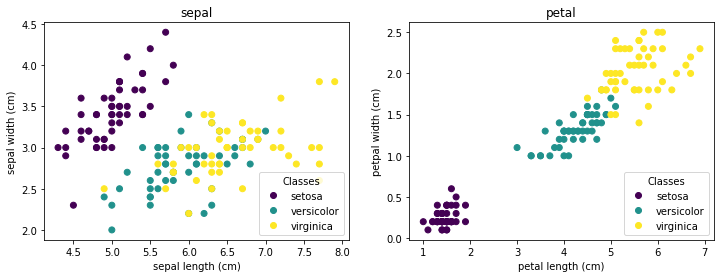

In [212]:
sepal_data = data[:, 0:2]
petal_data = data[:, 2:]
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
scatter = ax[0].scatter(sepal_data[:, 0], sepal_data[:, 1], c=target)
scatter = ax[1].scatter(petal_data[:, 0], petal_data[:, 1], c=target)

ax[0].set_xlabel('sepal length (cm)'); ax[0].set_ylabel('sepal width (cm)')
ax[0].set_title('sepal')
_ = ax[0].legend(scatter.legend_elements()[0], data_frame.target_names, loc="lower right", title="Classes")

ax[1].set_xlabel('petal length (cm)'); ax[1].set_ylabel('petpal width (cm)')
ax[1].set_title('petal')
_ = ax[1].legend(scatter.legend_elements()[0], data_frame.target_names, loc="lower right", title="Classes")

## Test KNN

In [257]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=17, shuffle=True)

In [275]:
y_pred = knn(X_train, y_train, X_test, k=5, distance_fn=euclidean_distance, choice_fn=classification)
np.mean(y_pred - y_test == 0)*100

93.33333333333333

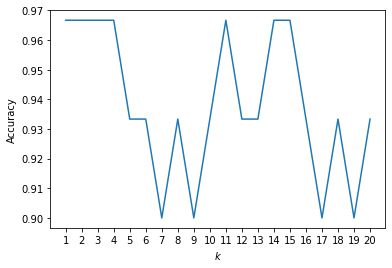

In [269]:
acc = []
K = range(1, 21)
for k in K:
    y_pred = knn(X_train, y_train, X_test, k=k, distance_fn=euclidean_distance, choice_fn=classification)
    acc.append(np.mean(y_pred - y_test == 0))

plt.plot(K, acc)
plt.xlabel('$k$'); plt.ylabel('Accuracy')
plt.xticks(K)
plt.show()